In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
df.describe(include='all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,291155,Comcast,24-06-15,24-Jun-15,4:38:27 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [7]:
df.shape

(2224, 11)

Text(0.5, 1.0, 'MONTHLY TREND CHART')

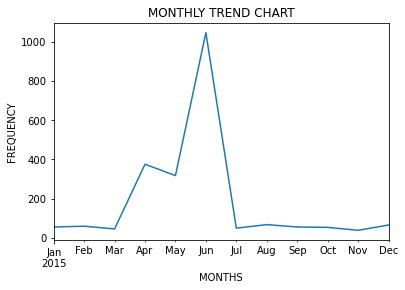

In [8]:
#Provide the trend chart for the number of complaints at monthly and daily granularity levels.
df['Date_month_year']=df['Date_month_year'].apply(pd.to_datetime)
df=df.set_index('Date_month_year')
months=df.groupby(pd.Grouper(freq='M')).size().plot()
plt.xlabel("MONTHS")
plt.ylabel("FREQUENCY")
plt.title("MONTHLY TREND CHART")

In [9]:
df['Date'].value_counts()[:10]

24-06-15    218
23-06-15    190
25-06-15     98
26-06-15     55
30-06-15     53
29-06-15     51
18-06-15     47
06-12-15     43
27-06-15     39
15-06-15     34
Name: Date, dtype: int64

Text(0.5, 1.0, 'DAILY TREND CHART')

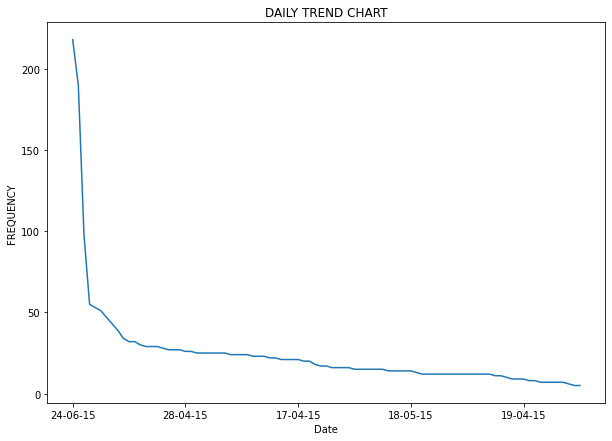

In [10]:
#plotting Daily chart

df=df.sort_values(by='Date')
plt.figure(figsize=(10,7))
df['Date'].value_counts().plot()
plt.xlabel("Date")
plt.ylabel("FREQUENCY")
plt.title("DAILY TREND CHART")

In [11]:
#Provide a table with the frequency of complaint types.


df['Customer Complaint'].value_counts()[:10]

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Data Caps                   11
Comcast Billing             11
Comcast Data Caps           11
Unfair Billing Practices     9
Data Cap                     8
Comcast/Xfinity              8
Name: Customer Complaint, dtype: int64

<AxesSubplot:>

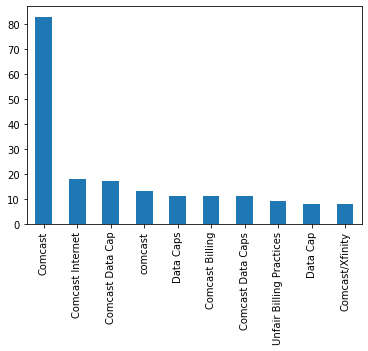

In [12]:
df['Customer Complaint'].value_counts()[:10].plot.bar()

In [13]:
#Which complaint types are maximum i.e., around internet, network issues, or across any other domains
internet_issues1=df[df['Customer Complaint'].str.contains('network')].count()
internet_issues2=df[df['Customer Complaint'].str.contains('speed')].count()
internet_issues3=df[df['Customer Complaint'].str.contains('data')].count()
internet_issues4=df[df['Customer Complaint'].str.contains('internet')].count()
billing_issues1=df[df['Customer Complaint'].str.contains('billing')].count()
billing_issues2=df[df['Customer Complaint'].str.contains('charges')].count()
service_issues1=df[df['Customer Complaint'].str.contains('service')].count()
service_issues2=df[df['Customer Complaint'].str.contains('customer')].count()
total_internet_issues=internet_issues1+internet_issues2+internet_issues3+internet_issues4
total_billing_issues=billing_issues1+billing_issues2
total_service_issues=service_issues1+service_issues2
other_issues=2224-(total_billing_issues+total_internet_issues+total_service_issues)
other_issues

Ticket #                       1321
Customer Complaint             1321
Date                           1321
Time                           1321
Received Via                   1321
City                           1321
State                          1321
Zip code                       1321
Status                         1321
Filing on Behalf of Someone    1321
dtype: int64

In [14]:
total_billing_issues

Ticket #                       169
Customer Complaint             169
Date                           169
Time                           169
Received Via                   169
City                           169
State                          169
Zip code                       169
Status                         169
Filing on Behalf of Someone    169
dtype: int64

In [15]:
total_internet_issues

Ticket #                       374
Customer Complaint             374
Date                           374
Time                           374
Received Via                   374
City                           374
State                          374
Zip code                       374
Status                         374
Filing on Behalf of Someone    374
dtype: int64

In [16]:
total_service_issues

Ticket #                       360
Customer Complaint             360
Date                           360
Time                           360
Received Via                   360
City                           360
State                          360
Zip code                       360
Status                         360
Filing on Behalf of Someone    360
dtype: int64

In [17]:
#Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

df['newstatus']=['Open' if status=="Open" or status=='Pending' else 'Closed'  for status in df['Status']]
df.sample(10)

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,newstatus
Date_month_year,,,,,,,,,,,
2015-12-06,338192,"Speed throttling, speeds not at promised output",06-12-15,6:35:59 PM,Customer Care Call,Yorkville,Illinois,60560,Open,Yes,Open
2015-06-23,360308,"Worst speed, no competition, and billing does ...",23-06-15,10:12:08 PM,Internet,Columbus,Indiana,47201,Solved,No,Closed
2015-06-25,367099,Unfair Comcast billing practices,25-06-15,9:11:31 PM,Internet,Mount Laurel,New Jersey,8054,Open,No,Open
2015-06-24,363717,Comcast Internet Slow,24-06-15,11:59:59 PM,Customer Care Call,Houston,Texas,77025,Solved,No,Closed
2015-05-16,293228,Comcast sales people not reflect what they sai...,16-05-15,12:17:03 PM,Customer Care Call,Wheeling,Illinois,60090,Solved,No,Closed
2015-06-25,366291,Comcast started charging a lease fee for equip...,25-06-15,4:35:18 PM,Customer Care Call,Chicago,Illinois,60625,Solved,No,Closed
2015-05-06,325642,Comcast Trespassing,06-05-15,3:02:15 PM,Internet,Scranton,Pennsylvania,18509,Closed,No,Closed
2015-06-24,363273,Comcast throttling speeds,24-06-15,7:27:52 PM,Customer Care Call,Happy Valley,Oregon,97086,Closed,No,Closed
2015-04-14,235629,Comcast Cable Billing Fraud,14-04-15,6:02:57 PM,Customer Care Call,Shreveport,Louisiana,71106,Closed,No,Closed


In [18]:
#Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
state_complain=df.groupby(['State','newstatus']).size().unstack()
state_complain

newstatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,NaN
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,NaN


<AxesSubplot:xlabel='State'>

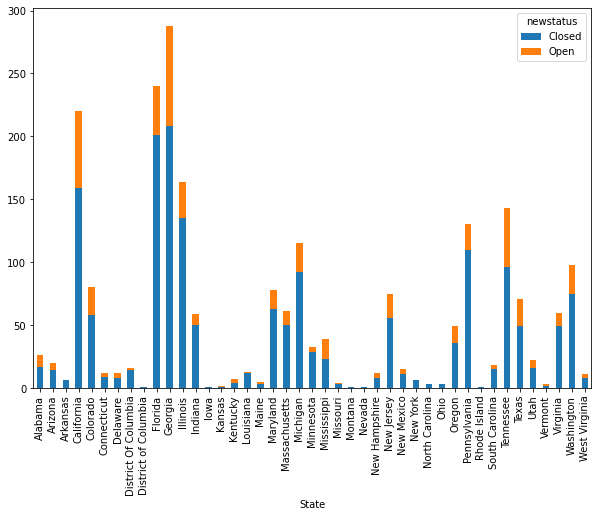

In [19]:
state_complain.plot.bar(figsize=(10,7),stacked=True)

In [20]:
#Which state has the maximum complaints
df.groupby(['State']).size().sort_values(ascending=False)[:1]

State
Georgia    288
dtype: int64

In [21]:
#Which state has the highest percentage of unresolved complaints
df.newstatus.value_counts()

Closed    1707
Open       517
Name: newstatus, dtype: int64

In [22]:
unresolved_data=df.groupby(['State','newstatus']).size().unstack().fillna(0).sort_values(by="Open",ascending=False)
unresolved_data['unresolved_cmp_prct']=unresolved_data['Open']/unresolved_data['Open'].sum()*100
unresolved_data

newstatus,Closed,Open,unresolved_cmp_prct
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Washington,75.0,23.0,4.448743
Michigan,92.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


<AxesSubplot:xlabel='State'>

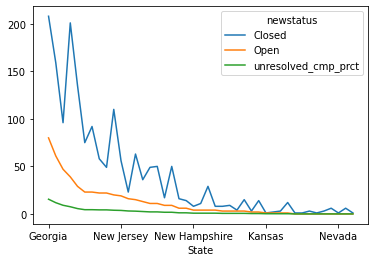

In [23]:
unresolved_data.plot()

In [24]:
#Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls
resolved_data=df.groupby(['Received Via','newstatus']).size().unstack().fillna(0)
resolved_data['resolved']=resolved_data['Closed']/resolved_data['Closed'].sum()*100
resolved_data['resolved']


Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64

<AxesSubplot:xlabel='Received Via'>

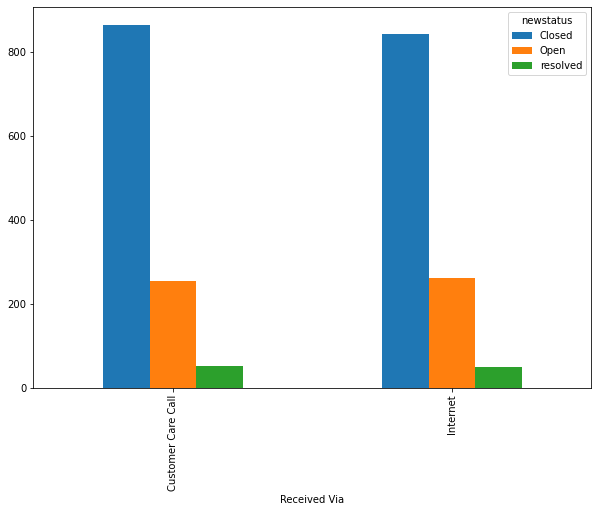

In [25]:
resolved_data.plot(kind='bar',figsize=(10,7))